# *Optical Tweezers* | Lab-Session #6
## Feb-22-2021 17:05

This jupyter notebook is a used to collect and analyse data during today's lab session

In [113]:
# Import the relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.constants as consts
import os
from csvlib import *
from scipy.optimize import curve_fit
from IPython.display import display, Markdown


# Display mpl in notebook format
%matplotlib inline

# Data Collection

Experiment: A stuck bead (PBS sample) is centered at the position of the laser. For x and y axis separately, the stage is moved a certain amount by setting a voltage in Lab View. The bead is then moved back at the center by adjusting the knobs on the stage. The position of the stage is read from the micrometer scale on the knobs, before applying voltage (initial position) and after moving it back to the center (final position).

In [114]:
%%script echo skipping 

# open CSV files to numpy array
csvs = list_csv(PRINT='True')   # Lists CSV files in a given directory
DATA = pd.read_csv(csvs[0])     # Gets the CSV file as a Pandas Data Frame
data = DATA.to_numpy().T        # Gets data as a numpy array
DATA                            # Prints pretty PANDAS data frame

skipping


In [115]:
# positions read from the micrometer scale on the stage

# moving along X
x_pos_i = np.array([30.,30.,30.,29.,28.8])
x_pos_f = np.array([25.0,22.0,18.1,13.6,11.8])

x_pos = x_pos_i - x_pos_f

x_V = np.array([3.,5.,7.,9.,10.])


# moving along Y
y_pos_i = np.array([12.0,11.0,10.5,10.9,10.3])
y_pos_f = np.array([7.6,4.0,0.0,-3.8,-6.3])

y_pos = y_pos_i - y_pos_f

y_V = np.array([3.,5.,7.,9.,10.])

# errors

# error from scale reading the position?
# pos_err = np.repeat(??,len(x_pos))


# Data Analysis

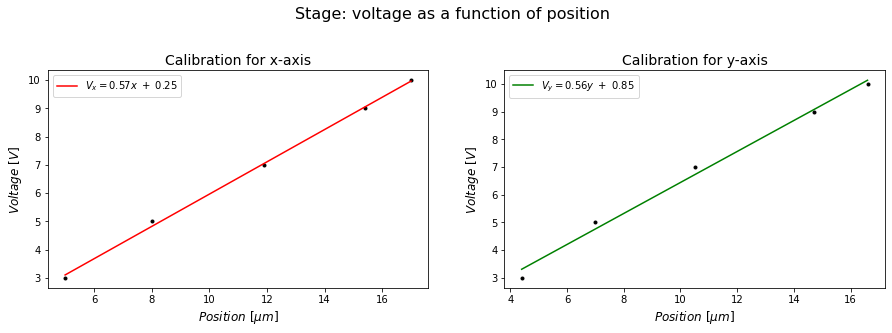

In [116]:
# voltage as a function of position

get_V=[]

fig = plt.figure(figsize=(15,4))
ax_x,ax_y = fig.subplots(1,2)
fig.suptitle('Stage: voltage as a function of position',fontsize=16,y=1.1)

# plot for x axis
ax_x.set_title('Calibration for x-axis',fontsize=14)

ax_x.set_xlabel(r'$Position\ [\mu m]$',fontsize=12)
ax_x.set_ylabel(r'$Voltage\ [V]$',fontsize=12)

ax_x.plot(x_pos,x_V,'.k')

m, b = np.polyfit(x_pos, x_V, 1)

ax_x.plot(x_pos,m*x_pos+b,label = r'$V_x = {} x\ +\ {} $'.format(round(m,2),round(b,2)),c='r')

ax_x.legend(fontsize = 10)

get_V.append(m)

# plot for y axis
ax_y.set_title('Calibration for y-axis',fontsize=14)

ax_y.set_xlabel(r'$Position\ [\mu m]$',fontsize=12)
ax_y.set_ylabel(r'$Voltage\ [V]$',fontsize=12)

ax_y.plot(y_pos,y_V,'.k')

m, b = np.polyfit(y_pos, y_V, 1)

ax_y.plot(y_pos,m*y_pos+b,label = r'$V_y = {} y\ +\ {} $'.format(round(m,2),round(b,2)),c='g')

ax_y.legend(fontsize = 10)

get_V.append(m)

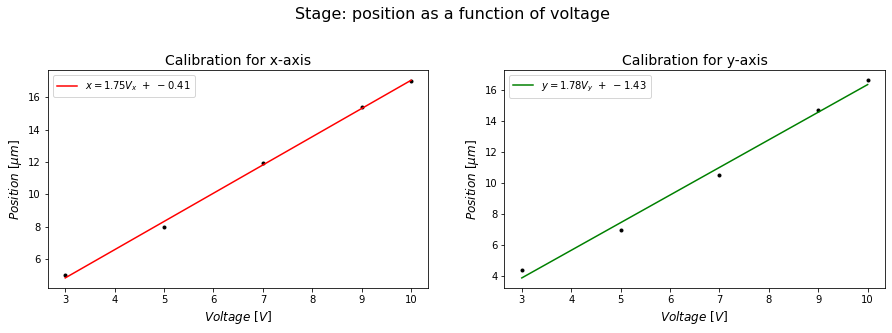

In [117]:
# position as a function of voltage

get_pos=[]

fig = plt.figure(figsize=(15,4))
ax_x,ax_y = fig.subplots(1,2)
fig.suptitle('Stage: position as a function of voltage',fontsize=16,y=1.1)

# plot for x axis
ax_x.set_title('Calibration for x-axis',fontsize=14)

ax_x.set_ylabel(r'$Position\ [\mu m]$',fontsize=12)
ax_x.set_xlabel(r'$Voltage\ [V]$',fontsize=12)

ax_x.plot(x_V,x_pos,'.k')

m, b = np.polyfit(x_V, x_pos, 1)

ax_x.plot(x_V,m*x_V+b,label = r'$x = {} V_x\ +\ {} $'.format(round(m,2),round(b,2)),c='r')

ax_x.legend(fontsize = 10)

get_pos.append(m)

# plot for y axis
ax_y.set_title('Calibration for y-axis',fontsize=14)

ax_y.set_ylabel(r'$Position\ [\mu m]$',fontsize=12)
ax_y.set_xlabel(r'$Voltage\ [V]$',fontsize=12)

ax_y.plot(y_V,y_pos,'.k')

m, b = np.polyfit(y_V,y_pos, 1)

ax_y.plot(y_V,m*y_V+b,label = r'$y = {} V_y\ +\ {} $'.format(round(m,2),round(b,2)),c='g')

ax_y.legend(fontsize = 10)

get_pos.append(m)

# Results

In [118]:
display(Markdown(
   rf"""
To find change in the position of stage from applied voltage:   
   
x-axis: $\Delta x = {round(get_pos[0],2)}\Delta V_x $

$\rho_x = {round(get_pos[0],2)} \mu m/V $

y-axis: $\Delta y = {round(get_pos[1],2)}\Delta V_y $

$\rho_y = {round(get_pos[1],2)} \mu m/V $

"""))


To find change in the position of stage from applied voltage:   
   
x-axis: $\Delta x = 1.75\Delta V_x $

$\rho_x = 1.75 \mu m/V $

y-axis: $\Delta y = 1.78\Delta V_y $

$\rho_y = 1.78 \mu m/V $



In [119]:
display(Markdown(
   rf"""
To find voltage change for a given change in stage position:   
   
x-axis: $\Delta V_x = {round(get_V[0],2)}\Delta x $

$\beta_x = {round(get_V[0],2)}\ V/\mu m $

y-axis: $\Delta V_y = {round(get_V[1],2)}\Delta y $

$\beta_y = {round(get_V[1],2)}\ V/\mu m $

"""))


To find voltage change for a given change in stage position:   
   
x-axis: $\Delta V_x = 0.57\Delta x $

$\beta_x = 0.57\ V/\mu m $

y-axis: $\Delta V_y = 0.56\Delta y $

$\beta_y = 0.56\ V/\mu m $

